 ### تبدیل فایل اکسل کامنت ها به سی اس وی برای بهتر نمایش دادن داده ها ###

In [5]:
import pandas as pd

df = pd.read_excel("comment.xlsx")
df.to_csv("comment.csv", index=False)

# بارگذاری داده ها و نمایش مشخصات داده #

دراین قسمت اطلاعات مربوط به داده مان را در هر بخش آن خواهیم داشت

In [31]:
data = pd.read_csv("comment.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100008 entries, 0 to 100007
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_id    100008 non-null  int64 
 1   confirmed_at  100008 non-null  object
 2   comment       99903 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


# نمایش پنج ردیف اول داده ها #

In [34]:
data.head()

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...


# نمایش پنج ردیف آخر داده ها #

با این کار هم میتوانیم ۵ داده از آخر را ببینیم و حتی مطلع شویم که داده های ماچند سطر هستند

In [10]:
data.tail()

,product_id,confirmed_at,comment
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر . با این پول سخت ...
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم . و باید بگ...
100006,33874,2018-07-09 21:26:12,دوسال و.نیم پیش از دیجی کالا گرفتم. هنوز مثل ر...
100007,318278,2018-07-09 21:26:02,با استفاده از این شامپو مشکل خشکی مو و پوست سر...


# پیش پردازش داده ها #

دراین قسمت اعلان ها و کاراکترهای غیر ضروری رو در کامنت ها رو حذف میکنیم

In [13]:
import re

def preprocess_text(text_value):
    if pd.isna(text_value):
        return ''
    text = re.sub(r'[^آ-ی\s]', '', text_value)
    return text

data["processed_comment"] = data["comment"].apply(preprocess_text)

data[["comment", "processed_comment"]].head()

,comment,processed_comment
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,سلام قبل اینکه نظرم رو بگم میخواستم به یک موضو...
1,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...,بوی تند ولی خوشبو دارهماندگاریش خوبه و هر چقدر...
2,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...,این تیغ محصول کشور آمریکا هست در عکس محصول مش...


In [ ]:
### تعداد کامنت ها در ماه های موجود ###

در ابتدا یک ستون از ماه ها به دیتای خودمون اضافه کردم و در فایل دیتاهای خود از ماه ۳ تا ۱۰ رو داشتیم که تعداد کامنت ها در هر ماه رو روی نمودار رسم کردم تا از تعداد آن ها در هر ماه با خبر شیم
همچنین تعداد دقیق هر کامنت در هر ماه هم نوشته شده است

تعداد کامنت ها در ماه 3 = 4370
تعداد کامنت ها در ماه 4 = 33350
تعداد کامنت ها در ماه 5 = 26579
تعداد کامنت ها در ماه 6 = 26906
تعداد کامنت ها در ماه 7 = 7380
تعداد کامنت ها در ماه 8 = 319
تعداد کامنت ها در ماه 9 = 856
تعداد کامنت ها در ماه 10 = 248


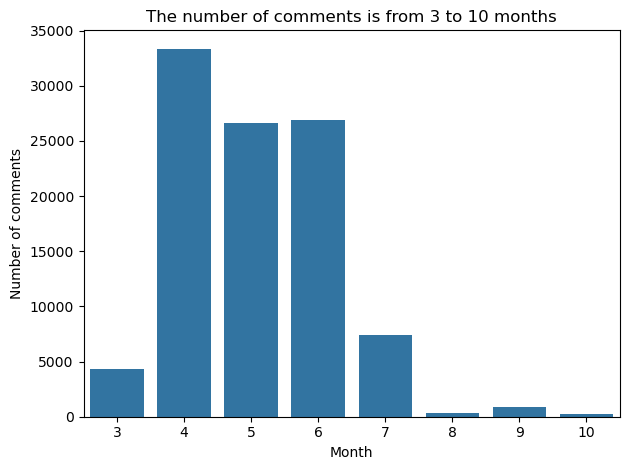

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data['confirmed_at'] = pd.to_datetime(df['confirmed_at'])
data['month'] = data['confirmed_at'].dt.month


sns.countplot(x='month', data=data)
plt.title("The number of comments is from 3 to 10 months")
plt.xlabel("Month")
plt.ylabel("Number of comments")


monthly_counts = data['month'].value_counts().sort_index()
i = 3
for x in monthly_counts:
    print(f"تعداد کامنت ها در ماه {i} = {x}")
    i+=1

plt.tight_layout()
plt.show()

In [17]:
result = data.groupby("product_id", "month").value_counts()
result

ValueError: No axis named month for object type DataFrame